In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

<Axes: xlabel='age', ylabel='height'>

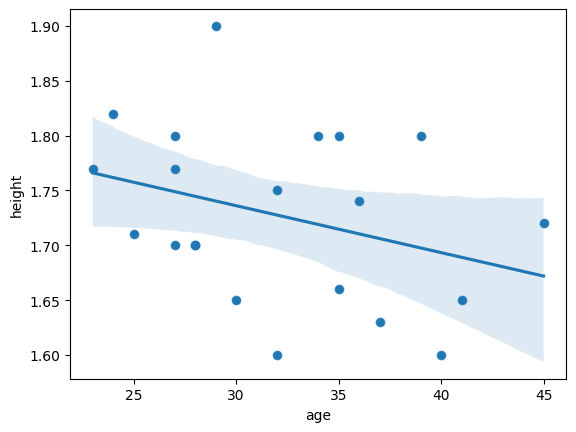

In [4]:
df_alumnos = pd.DataFrame(lista_alumnos, columns=['name','age','height'])
sns.scatterplot(data = df_alumnos, x='age', y = 'height')
sns.regplot(data = df_alumnos, x='age', y = 'height')

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [5]:
df_alumnos.corr(numeric_only=True)

,age,height
age,1.000000,-0.329275
height,-0.329275,1.000000


Tenemos una correlación negativa, y además poco relevante.

### Entrena un modelo de regresión lineal

In [6]:
x = df_alumnos[['age']]
y = df_alumnos['height']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,random_state=42)
lm = LinearRegression()
lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [7]:
y_test.reset_index()
# pd.Series(predictions)
errors = pd.concat([y_test.reset_index(),pd.Series(predictions,name='height_res')], axis=1)
errors = errors.iloc[:,1:]
errors['dif'] = abs(errors['height'] - errors['height_res'])
errors['dif_2'] = abs(errors['height'] - errors['height_res'])**2
errors

,height,height_res,dif,dif_2
0,1.82,1.752729,0.067271,0.004525
1,1.80,1.711329,0.088671,0.007863
2,1.75,1.719609,0.030391,0.000924
3,1.71,1.748589,0.038589,0.001489
4,1.74,1.703048,0.036952,0.001365
5,1.80,1.740309,0.059691,0.003563
6,1.65,1.727889,0.077889,0.006067


In [9]:
### A mano:
print('MAE: ',errors['dif'].mean())
print('MSE: ',errors['dif_2'].mean())
print('RMSE: ',np.sqrt(errors['dif_2'].mean()))

MAE:  0.05706488156539665
MSE:  0.0036851216240520687
RMSE:  0.060705202611078306


In [10]:
### Sklearn:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.root_mean_squared_error(y_test, predictions)**2)
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))

MAE: 0.05706488156539665
MSE: 0.0036851216240520682
RMSE: 0.060705202611078306
